pip install ucimlrepo

Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


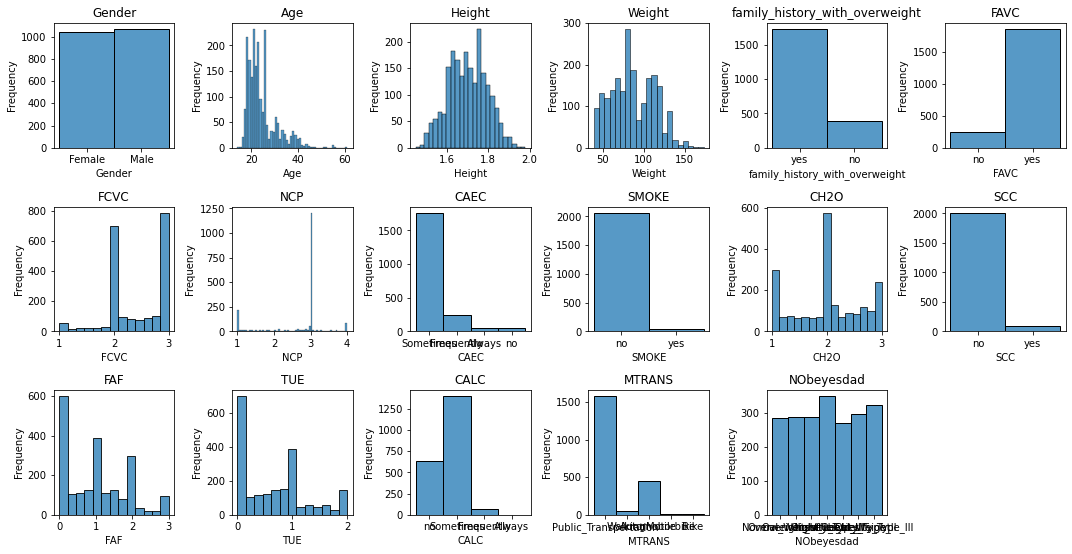

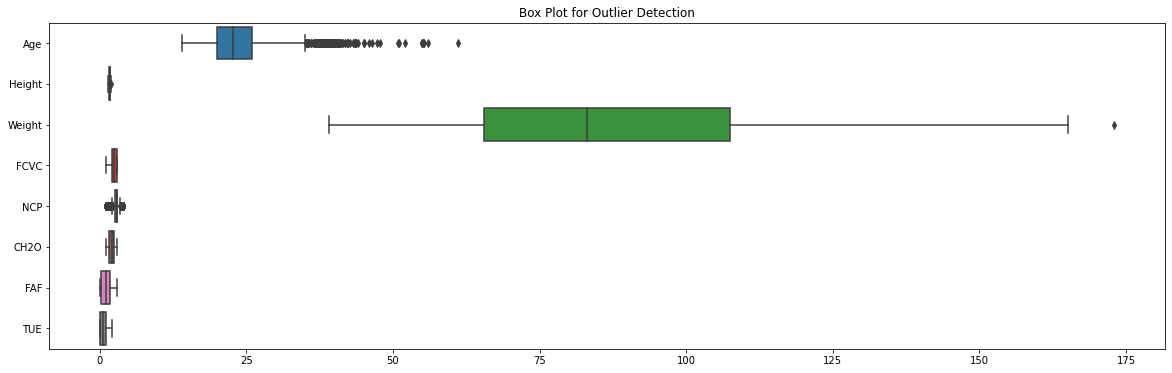

Explained variance ratio: [0.18254627 0.14477272 0.1069165  0.10299241 0.09214246 0.07812792
 0.07018295 0.06653116]
PC1: 0.1825 (18.25%)
PC2: 0.1448 (14.48%)
PC3: 0.1069 (10.69%)
PC4: 0.1030 (10.30%)
PC5: 0.0921 (9.21%)
PC6: 0.0781 (7.81%)
PC7: 0.0702 (7.02%)
PC8: 0.0665 (6.65%)
#-------------------------------------------------------------------
Target values are:
 0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int32  
 ------------------------------------
 Features dataframe is


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,FAF,TUE,CALC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,-0.300346,0,-0.013073,...,-1.188039,0.561997,-1.419172,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,-0.300346,1,1.618759,...,2.339750,-1.080625,0.521160,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,-0.300346,0,-0.013073,...,1.163820,0.561997,2.461491,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,-0.300346,0,-0.013073,...,1.163820,-1.080625,2.461491,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,-0.300346,0,-0.013073,...,-1.188039,-1.080625,0.521160,0.0,1.0,0.0,0.0,0.0,1.0,0.0


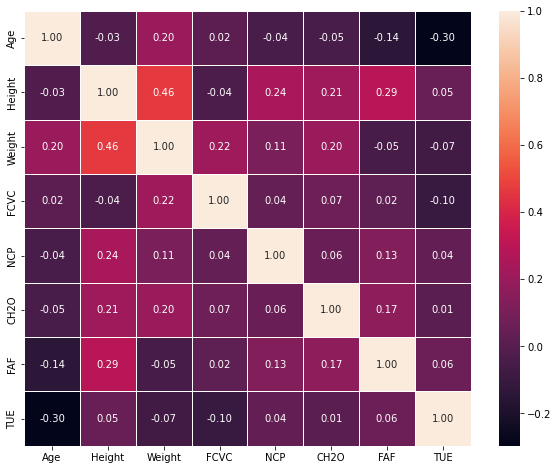

In [31]:
#from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.impute import SimpleImputer
import plotly.express as pdf

# Raw data is on my git
df =pd.read_csv("https://raw.githubusercontent.com/myadarishireesha/Machine-Learning-and-Data-Mining/refs/heads/main/Obesity.csv",delimiter=",")
df.head(5)
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


df.dtypes
df.describe()

#-----------Data Visualization
def plot_distributions(df):
  
    numerical_columns = df.select_dtypes(include=['float64', 'int64','object']).columns

    plt.figure(figsize=(15, 15))
    
    for i, column in enumerate( numerical_columns,1):
        plt.subplot(6, 6, i)  # Adjust the grid size
        sns.histplot(df[column])
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Call function
plot_distributions(df)
#-----------------------------------------------

plt.figure(figsize=(20, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot for Outlier Detection")
plt.show()

#----------------------------------------------------------
corr_matridf = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matridf, annot=True, fmt=".2f", linewidths=0.5)


#--------------Encoding
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

binary_cols =['family_history_with_overweight','FAVC','SMOKE','SCC']

for col in binary_cols:
    df[col]=le.fit_transform(df[col])

ordinal_cols = ['CAEC', 'CALC']

# Define the order of categories
frq_order = [['no', 'Sometimes', 'Frequently' ,'Always']]   #we have to give the order to avoid misleadings


ordinal_encoder = OrdinalEncoder(categories=frq_order)

for col in ordinal_cols:
    df[col]=ordinal_encoder.fit_transform(df[[col]])

onehot_encoder = OneHotEncoder(sparse=False)  # Set sparse=False to return a NumPy array

encoded_array = onehot_encoder.fit_transform(df[['Gender','MTRANS']])

# Convert the encoded array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(['Gender','MTRANS']))

# Concatenate with original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical column
df.drop(columns=['Gender','MTRANS'], inplace=True)
df.head()

# --------------------- Define Features and Target--------------------------------

# split features and target
X=df.drop(['NObeyesdad'],axis=True)

#Y=df[['NObeyesdad']].copy()  # dataframe
Y=df['NObeyesdad']   # categorical no need to scale them, it is a series 


#------------------- DATA Scaling ---------------------------------------
# remaining columns are 0, 1's by onehot encoder and lable encoders
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','CAEC','CALC']  
scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols]) # update numerical columns with scaled values in X

#print(X.head())

X_sc = pd.DataFrame(X, columns=X.columns, index=X.index)  # convert array to dataframe

#------------------------PCA ---------------------------------------------
pca = PCA(n_components=0.8)  # using all features 95% varience

df_pca = pca.fit_transform(X_sc)
#df_pca = pd.DataFrame(X_sc, columns=X_sc.columns, index=X_sc.index) 

explained_variance = pca.explained_variance_ratio_

# Check edfplained variance
print("Explained variance ratio:", explained_variance)
#print("New shape:", df_pca.shape)

for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f} ({var * 100:.2f}%)")

print("#-------------------------------------------------------------------")

print("Target values are:\n",Y.head()," \n ------------------------------------"
"\n Features dataframe is")
X.head()

# TRAIN MODEL FROM HERE 
* As it is logstic regression, check class imbalance of target all catageries should be in same size (Under sampling, oversampling) if yes: tranform the dataset
* Then split features X and target : Y
* Split train and test sets
* Model Configuration
*Train the model  find intercept,sploe,accuracy_score, 
* Test: predict,accuracy_score
* Error analysis : output = Y_test(original data) - Y_predicted
* Check metrics by confusion matric : false +ve, false -ve,
* ROC curve

0.9.1
Class=0, n=272 (12.885%)
Class=1, n=287 (13.595%)
Class=2, n=351 (16.627%)
Class=3, n=297 (14.069%)
Class=4, n=324 (15.348%)
Class=5, n=290 (13.738%)
Class=6, n=290 (13.738%)


c:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


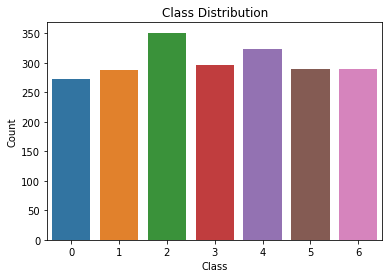

In [ ]:
import imblearn
print(imblearn.__version__)

class_counts = pd.Series(y).value_counts().sort_index()

# Print class distribution with percentages
for k, v in class_counts.items():
    per = (v / len(Y)) * 100
    print(f'Class={k}, n={v} ({per:.3f}%)')

# Plot the distribution
#plt.bar(class_counts.index, class_counts.values)
sns.countplot(Y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


#  Target classes are not higly imbalanced so, continuing with ASIS. 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split

#data_X, data_Y = oversample.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_sc, Y, test_size=0.3,random_state=100) 

print("X Training set size:", X_train.shape)
print("Y_train size",Y_train.shape)
print("X Testing set size:", X_test.shape)

print("Y_test size",Y_test.shape)

X_train.head()



X Training set size: (1477, 21)
Y_train size (1477,)
X Testing set size: (634, 21)
Y_test size (634,)


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,FAF,TUE,CALC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1503,-0.991077,-0.905691,-0.132299,1,1,1.044335,0.404153,-0.300346,0,-1.607854,...,0.018100,-0.566458,-1.419172,1.0,0.0,0.0,0.0,0.0,1.0,0.0
121,-0.206889,1.804435,0.321327,1,1,-2.658379,0.404153,1.834434,0,-0.013073,...,-1.188039,2.204618,2.461491,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1739,2.100335,0.518935,1.204054,1,1,-0.647844,0.404153,-0.300346,0,0.026148,...,-1.033556,-1.080625,0.521160,0.0,1.0,1.0,0.0,0.0,0.0,0.0
395,-0.679742,-1.733197,-1.817304,1,1,-2.658379,0.404153,-0.300346,0,-0.013073,...,2.339750,2.204618,0.521160,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45,-0.522124,-1.840398,-0.824368,1,0,-0.785019,0.404153,-0.300346,0,-1.644905,...,-1.188039,0.561997,-1.419172,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
# model configuration
logr = LogisticRegression(
    
    random_state=100, max_iter=10000, 
                              
    penalty='l1', solver='saga', 
                              
    verbose=True, n_jobs=-1
) 
logr
# Train model
logr.fit(X_train, Y_train)

print("Train Score is:",round(logr.score(X_train,Y_train),3)*100)




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 1463 epochs took 5 seconds
Train Score is: 96.6


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.7s finished


In [64]:
# Interpret Estimated paratmeters:
#To retrieve the intercept:
print(f"intercept is : {logr.intercept_}")

#For retrieving the slope:
print("slope is",logr.coef_)



intercept is : [-26.99209001   0.26392754   9.39879134   1.3411005   -0.97341592
   6.82711816  10.1345684 ]
slope is [[-1.83241743e-01  1.17921388e+01 -4.73422476e+01 -3.36513382e-03
   0.00000000e+00  5.15181696e-01  9.50988179e-02  5.31753254e-01
   0.00000000e+00  2.14242964e-01  0.00000000e+00  2.28369497e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.98044651e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.07629724e-02  7.26215344e+00 -2.59775756e+01 -3.52533343e-01
  -2.80467606e-01  0.00000000e+00  0.00000000e+00  4.67217821e-01
   1.08033615e-01  0.00000000e+00 -8.51619059e-02  2.24638690e-01
  -9.30096830e-02 -1.53779195e-01 -3.52609754e-01  0.00000000e+00
  -4.39592409e-01  0.00000000e+00  0.00000000e+00 -3.66309312e-01
   0.00000000e+00]
 [ 1.87701632e-01 -4.40796016e+00  1.31210579e+01  1.52605350e-01
   1.13297378e+00 -1.54693777e-01 -2.08661774e-01 -3.05389219e-02
   0.00000000e+00  3.22233658e-01  0.00000000e+00  6

In [71]:
# Testing Phase
Y_predicted = logr.predict(X_test)   # array
Y_predicted_df = pd.DataFrame(Y_predicted)   # converting array to Dataframe
print(f"Predicted values are : \n {Y_predicted}")



Predicted values are : 
 [5 4 4 6 2 1 3 1 0 3 6 0 6 4 0 2 0 1 2 6 2 6 0 1 2 3 5 1 5 4 5 2 2 4 0 4 5
 3 6 3 2 3 4 1 2 0 2 2 3 4 2 2 2 5 5 3 3 4 1 2 1 4 1 2 1 2 3 3 1 4 5 6 6 3
 1 2 2 4 4 4 2 0 5 2 3 2 2 6 0 1 6 6 3 6 1 6 0 0 1 6 5 1 2 3 1 1 3 5 2 6 1
 6 1 6 3 5 2 6 2 3 3 0 3 2 4 1 0 2 3 2 6 4 4 4 3 4 3 5 6 5 6 3 4 3 4 6 2 2
 4 6 0 6 4 5 2 4 0 1 6 2 1 1 2 4 1 4 5 4 4 3 2 0 4 5 5 5 3 6 3 6 0 6 3 6 3
 2 3 1 5 2 3 2 1 5 4 3 2 4 0 2 0 5 2 5 6 3 4 6 0 5 2 3 4 4 6 4 5 4 0 2 4 1
 6 0 5 0 0 1 5 3 3 4 6 5 4 5 6 4 0 3 4 0 2 3 5 5 4 0 4 4 6 4 1 2 4 6 3 5 4
 0 6 2 4 5 2 5 2 2 4 2 0 5 5 2 5 6 6 3 0 4 6 3 6 4 6 6 5 0 4 1 3 3 0 1 2 0
 0 2 4 6 3 3 3 0 1 1 1 5 2 4 6 6 5 2 5 4 4 1 1 2 2 3 5 5 3 6 4 3 6 5 5 5 2
 0 4 0 6 4 1 5 6 0 6 4 6 0 2 3 4 6 5 3 5 3 2 0 2 1 5 3 5 6 4 5 0 5 2 3 5 4
 2 0 0 5 0 6 2 4 5 4 6 6 4 1 6 4 1 6 5 2 4 0 2 6 0 0 1 1 0 2 1 6 5 6 0 6 2
 2 4 5 4 2 4 6 6 5 0 3 1 5 4 2 4 4 0 5 4 0 6 4 1 3 4 0 1 3 6 3 1 4 3 0 6 5
 1 5 2 6 3 4 0 3 6 1 5 0 5 1 2 4 6 6 3 1 1 0 5 0 2 2 4 4 6 3 0 6 5 6 4 1 1


[[ 85   0   0   0   0   0   0]
 [  1  69   0   0   0   8   0]
 [  0   0 101   4   0   0   2]
 [  0   0   0  78   0   0   0]
 [  0   0   0   0  99   0   0]
 [  0   3   0   0   0  86   5]
 [  0   0   4   0   0   3  86]]
Test Accuracy: 95.3
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       0.96      0.88      0.92        78
           2       0.96      0.94      0.95       107
           3       0.95      1.00      0.97        78
           4       1.00      1.00      1.00        99
           5       0.89      0.91      0.90        94
           6       0.92      0.92      0.92        93

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



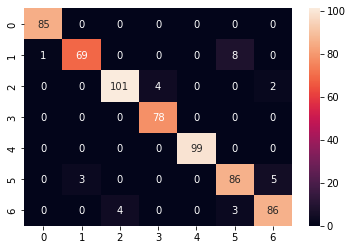

In [38]:


#Error Analysis
output = Y_test - Y_predicted

#print(output)

# confusion matrix
print(confusion_matrix(Y_test,Y_predicted ))
sns.heatmap(confusion_matrix(Y_test,Y_predicted ),annot=True, fmt='d')

# Evaluate model
accuracy = accuracy_score(Y_test, Y_predicted)
print("Test Accuracy:", round(accuracy,3)*100)


# Detailed performance metrics
print(classification_report(Y_test, Y_predicted))




In [28]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test,Y_predicted)

array([[[548,   1],
        [  0,  85]],

       [[553,   3],
        [  9,  69]],

       [[523,   4],
        [  6, 101]],

       [[552,   4],
        [  0,  78]],

       [[535,   0],
        [  0,  99]],

       [[529,  11],
        [  8,  86]],

       [[534,   7],
        [  7,  86]]], dtype=int64)

In [ ]:
def outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers for feature_",col,":",len(out))

#calling outliers the function
for col in df.drop('NObeyesdad',axis=1).columns:
    outliers(df[col])


# ENCODER TYPES
* OneHotEncoder for nominal columns  - MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'], which chnages the shape of current data frame
* OrdinalEncoder for ordinal columns. -CAEC, CALC: ['Sometimes' 'Frequently' 'Always' 'no']
*Label Encoder for target labels and binary data - Gender: ['Female' 'Male'],family_history_with_overweight: ['yes' 'no'],FAVC: ['no' 'yes'],SMOKE: ['no' 'yes'],SCC: ['no' 'yes']
.

# OrdinalEncoder
* Converts categories to integers like LabelEncoder but for multiple columns at once.
* Used when categories have an inherent order (e.g., "Low" < "Medium" < "High").

# NOw, SCALE THE DATA

StandardScaler transforms the data using Z-score normalization, which centers the data around zero with unit variance
* This ensures all features contribute equally regardless of their original scale.
*standarda scaler is mean is shifted to 0, values below the mean become negative, and values above the mean become positive.

USE:
    * Standardization (Z-score Normalization)-- for 
    * Log Transformation (For Skewed Data)
    * Min-Madf Scaling (For Non-Normal Data)--It keeps the data in 0 and 1

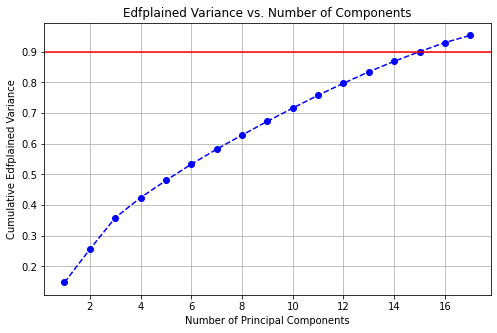

[0.14749662 0.25571724 0.3582907  0.42407602 0.47996749 0.53304987
 0.58182997 0.62793988 0.67293011 0.71593269 0.7579204  0.79697214
 0.83435271 0.86858448 0.89995344 0.92960185 0.95307317]


In [ ]:


# Cumulative sum of edfplained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 
         marker='o', linestyle='--', color='b')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Edfplained Variance')
plt.title('Edfplained Variance vs. Number of Components')
plt.axhline(y=0.90, color='r', linestyle='-')  # 90% threshold line
plt.grid()
plt.show()




In [ ]:
red line indicates the 90% confidence intervel.so, using N=14 , 14 features is good to perform PCA.

Target column NObeyesdad is not nuerical Value. It is having 7 catageorical values. So, we can apply Logistic regression model.

In [ ]:
from scipy import stats

def test_normality(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    results = {}
    
    for column in numerical_columns:
        # Perform the Shapiro-Wilk test for normality
        stat, p_value = stats.shapiro(df[column].dropna())  # dropna() to avoid missing values
        results[column] = p_value
    
    # Print the results
    for column, p_value in results.items():
        print(f'Normality Test for {column} - p-value: {p_value}')
        if p_value > 0.05:
            print(f'{column} is likely normally distributed.')
        else:
            print(f'{column} is not normally distributed.')
            
# Edfample usage
test_normality(df)


Normality Test for Age - p-value: 9.894708586443966e-41
Age is not normally distributed.
Normality Test for Height - p-value: 0.0
Height is not normally distributed.
Normality Test for Weight - p-value: 2.321447087939065e-40
Weight is not normally distributed.
Normality Test for FCVC - p-value: 0.0
FCVC is not normally distributed.
Normality Test for NCP - p-value: 0.0
NCP is not normally distributed.
Normality Test for CH2O - p-value: 6.3618950280346695e-43
CH2O is not normally distributed.
Normality Test for FAF - p-value: 0.0
FAF is not normally distributed.
Normality Test for TUE - p-value: 0.0
TUE is not normally distributed.
